In [1]:
import matplotlib.pyplot as pl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

from second_order import n_solver
from dat_importer import get_initial
%matplotlib inline

In [2]:
from astropy import constants as const
from astropy import units as u


In [3]:
G = const.G.to("AU3 M_earth-1 d-2").value
G

8.88769165499824e-10

In [4]:

def x0j(x0, xj): return x0 - xj

def gravity(x0, xj, mj): return -G*mj*x0j(x0, xj) / \
    np.linalg.norm(x0j(x0, xj))**3

def ode(t, x, v, i, N, dim=3):
    """
    returns acceleration for the i-th body, as a three dimensional array

    a = (ax, ay, az)
    """
    a = np.zeros(dim)
    xi = x[i]

    for j in range(N):
        if j != i:
            a += gravity(xi, x[j], m[j])

    return a


In [46]:
R, m, x0, v0 = get_initial("../initial/earth_sun.csv", delimiter=',')

In [31]:
TMIN = 0.
TMAX = 10000
N = 10000

t = np.linspace(TMIN, TMAX, N)

x, v = n_solver(ode, TMIN, TMAX, x0, v0, N)

|                                                  | 28%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

|                                                  | 62%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

|                                                  | 94%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--No

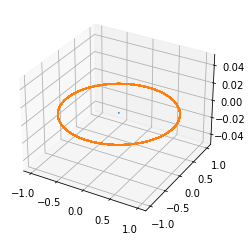

In [19]:
fig = pl.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(x.shape[0]):
    ax.plot(x[i, :, 0], x[i, :, 1], x[i, :, 2])

In [8]:
def potential(x, m, t):
    N = len(x)
    energy = 0.

    for i in range(N):
        x0 = x[i][t]

        for j in range(i+1, N):
            xij = x0 - x[j][t]
            x_norm = np.linalg.norm(xij)
            energy += - G*m[j]/x_norm

    return energy


def total_energy(x, v, m, N, P):
    total_energy = np.zeros(N)

    for i in range(P):
        mi = m[i]
        vi = v[i]

        for t in range(N):
            v2 = np.linalg.norm(vi[t])

            total_energy[t] += 0.5*mi*v2**2


    for t in range(N):
        total_energy[t] += potential(x, m, t)

    return total_energy

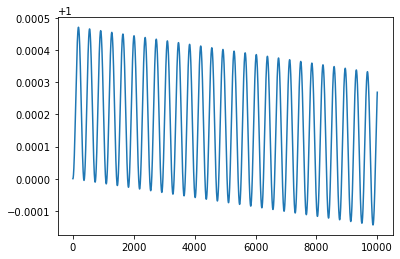

In [20]:
energy = total_energy(x, v, m, N, len(x))

energy /= energy[0]

_ = pl.figure()
_ = pl.plot(t, energy)

pl.show()

In [15]:
def angular_momentum(x, v, m, N, P):
    L = np.zeros(N)

    for i in range(P):
        mi = m[i]
        vi = v[i]
        xi = x[i]

        for t in range(N):
            L[t] = np.linalg.norm(np.cross(xi,mi*vi[t]))


    return L

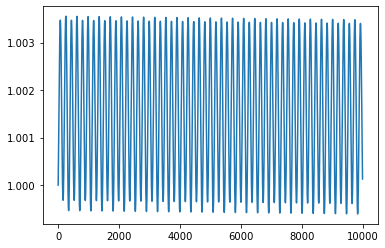

In [21]:
L = angular_momentum(x, v, m, N, len(x))

L /= L[0]

_ = pl.figure()
_ = pl.plot(t, L)

pl.show()

### Variar eccentricidad

In [32]:
ecc = [0.0167, 0.2, 0.2, 0.5]

In [33]:
x = np.empty(4, object)
v = np.empty(4, object)

for i, e in enumerate(ecc):
    x_0 = x0[:,:]
    x_0[0, 0] += e
    x[i], v[i] = n_solver(ode, TMIN, TMAX, x0, v0, N)

|                                                  | 26%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

|                                                  | 58%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

|                                                  | 90%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--No

In [39]:
x[0].shape

(2, 10000, 3)

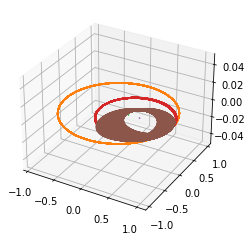

In [44]:
fig = pl.figure()
ax = fig.add_subplot(111, projection='3d')

for j in range(x.shape[0]-1):
    for i in range(x[j].shape[0]):
        ax.plot(x[j][i, :, 0], x[j][i, :, 1], x[j][i, :, 2])

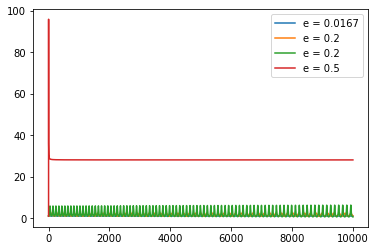

In [48]:
_ = pl.figure()
for i in range(len(x)):
    energy = total_energy(x[i], v[i], m, N, len(x[i]))

    energy /= energy[0]

    _ = pl.plot(t, energy, label=f"e = {ecc[i]}")

_ = pl.legend()

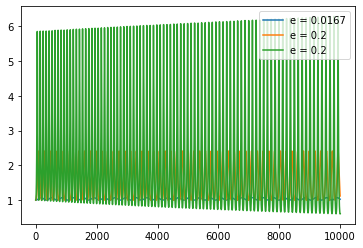

In [54]:
_ = pl.figure()
for i in range(len(x)-1):
    energy = total_energy(x[i], v[i], m, N, len(x[i]))

    energy /= energy[0]

    _ = pl.plot(t, energy, label=f"e = {ecc[i]}")

_ = pl.legend()